# Decorators
Decorators modify the behaviour of any function

1. input function 
2. output function -> wrapper

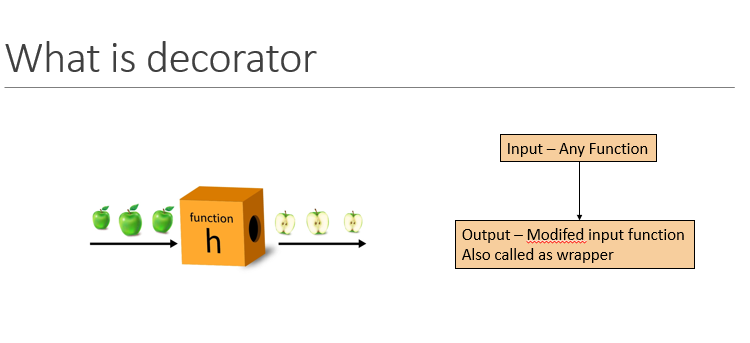

In [1]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User")
        res = func(*args, **kwargs)
        print(f"Function Results : {res}")
        print("Thank You!")
        return res

    return wrapper

In [2]:
# Call the decorator
import math


@welcome
def hypotenuse(a: float, b: float) -> float:
    c = math.sqrt(a**2 + b**2)
    return c

In [3]:
h1 = hypotenuse(3.0, 4.0)

Welcome User
Function Results : 5.0
Thank You!


In [4]:
h1

5.0

In [5]:
h2 = hypotenuse(12.5, 13.2)

Welcome User
Function Results : 18.179383927955314
Thank You!


In [6]:
# Apply welcome decorator on simple interst function


@welcome
def simple_intrest(p: float, n: float, r: float) -> tuple[float, float]:
    i = (p * n * r) / 100
    a = p + i
    return i, a

In [7]:
i1, a1 = simple_intrest(p=50_000.0, n=5.0, r=7.5)

Welcome User
Function Results : (18750.0, 68750.0)
Thank You!


In [8]:
i1

18750.0

In [9]:
a1

68750.0

In [10]:
i2, a2 = simple_intrest(p=23_000.0, n=5.5, r=6.5)

Welcome User
Function Results : (8222.5, 31222.5)
Thank You!


# Create a decorator to measure time required for execution

In [11]:
import time

In [15]:
start = time.perf_counter()  # Start measuring the time
time.sleep(2)  # This will keep kernel idle for 2 seconds
print("Hello")
time.sleep(3)
print("World")
stop = time.perf_counter()  # Stop measuring time
elapsed = stop - start
print(f"Time required for execution : {elapsed:.2f} sec")

Hello
World
Time required for execution : 5.02 sec


In [16]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        # Start measuring the time
        start = time.perf_counter()
        # Calculate function results and print
        res = func(*args, **kwargs)
        print(f"Results : {res}")
        # Stop measuring time
        stop = time.perf_counter()
        # Calulate time for execution
        elapsed = stop - start
        print(f"Time required to execute code : {elapsed:.2f} sec")
        return res

    return wrapper

In [18]:
@measure_time
def square(n: int) -> int:
    time.sleep(4.5)
    return n**2

In [19]:
s1 = square(24)

Results : 576
Time required to execute code : 4.50 sec


In [30]:
import random

random.randint(1, 10)

8

In [31]:
@measure_time
def square_random(n: int) -> int:
    s = random.randint(1, 10)
    time.sleep(s)
    return n**2

In [32]:
s2 = square_random(12)

Results : 144
Time required to execute code : 6.00 sec


In [33]:
s3 = square_random(23)

Results : 529
Time required to execute code : 8.00 sec


In [34]:
s4 = square_random(128)

Results : 16384
Time required to execute code : 3.01 sec


In [35]:
def compound_intestest(p: float, n: float, r: float) -> float:
    time.sleep(3)
    a = p * (1 + (r / 100)) ** n
    i = a - p
    return i

In [38]:
i1 = compound_intestest(p=23_500.0, n=4.0, r=6.5)
print(i1)

6731.959239687494


In [42]:
# alternate way to call the decorator
comp_int_with_time = measure_time(compound_intestest)

In [41]:
i2 = comp_int_with_time(p=30_000.0, n=7.0, r=7.5)

Results : 19771.474201721176
Time required to execute code : 3.00 sec


# Measure time requried for file download

In [43]:
url = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv


In [44]:
url.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'refs',
 'heads',
 'main',
 'artifacts',
 'data.csv']

In [45]:
url.split("/")[-1]

'data.csv'

In [46]:
from urllib.request import urlretrieve


@measure_time
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"{filename} download started ...")
    urlretrieve(url, filename)
    print(f"{filename} download successful!")

In [47]:
url

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv'

In [48]:
download_file(url)

data.csv download started ...
data.csv download successful!
Results : None
Time required to execute code : 3.07 sec


In [49]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [50]:
df.shape

(193573, 11)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [53]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [55]:
df.describe(include="object").T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [58]:
a = (
    df.groupby(by="color")
    .agg({"price": "mean"})
    .sort_values(by="price", ascending=False)
    .round(2)
)

In [59]:
a

,price
color,
J,5756.31
I,5523.76
H,4776.55
G,4113.44
F,3652.35
E,2991.45
D,2976.19


<Axes: xlabel='color'>

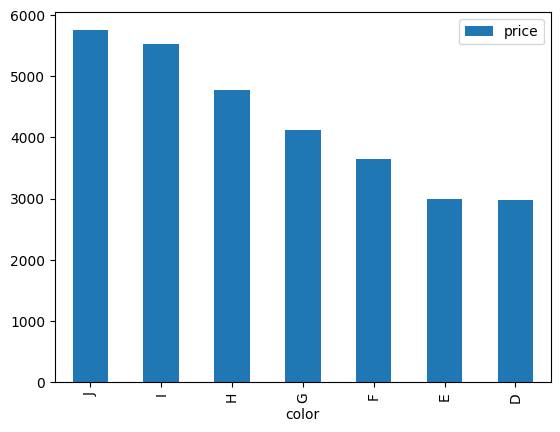

In [60]:
a.plot(kind="bar")